In [16]:
import numpy as np
import pandas as pd

In [17]:
import random
random.seed(42)

In [18]:
dataset = pd.read_csv("data.csv")
dataset = dataset.dropna()

In [19]:
dataset.drop(['symbol'], axis = 1) 

,date,open,close,low,high,volume
0,2016-01-05,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
851259,2016-12-30,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,44.730000,45.450001,44.410000,45.590000,1380900.0


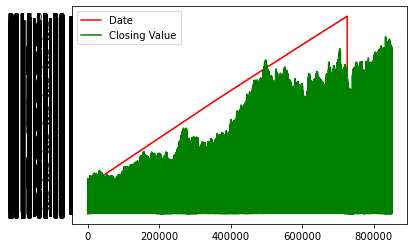

In [20]:
import matplotlib.pyplot as plt        
y_label=np.array(dataset['close'])
x_label=np.array(dataset['date'])
plt.plot(x_label, color='r', label='Date')
plt.plot(y_label, color='g', label='Closing Value')
plt.legend()
plt.show()

In [21]:
dataset['H-L'] = dataset['high'] - dataset['low']
dataset['O-C'] = dataset['close'] - dataset['open']
dataset['3day MA'] = dataset['close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['close'].rolling(5).std()
dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)

In [22]:
dataset = dataset.dropna()

In [23]:
X = dataset.iloc[:, 7:-1]
y = dataset.iloc[:, -1]
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
30,3.269997,0.479995,109.949997,111.008999,112.777666,2.073025
31,5.120003,-1.040001,111.203331,110.763999,112.303000,1.485878
32,2.220001,1.680000,111.056666,110.225999,111.981333,1.036451
33,1.450005,-0.480004,111.656667,110.127999,111.917666,0.987193
34,2.669998,0.790001,111.753334,110.200999,111.760000,0.966555
...,...,...,...,...,...,...
851259,1.080002,-0.110001,50.506667,58.246999,65.910000,34.653861
851260,0.620002,-0.029999,68.399999,54.977000,66.644334,26.118796
851261,0.470002,-0.110000,69.856667,55.211000,65.543334,25.793282
851262,1.180000,0.720001,66.589999,56.838000,64.872000,24.514858


In [24]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

ERROR: Exception:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "D:\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "D:\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "D:\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "D:\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "D:\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "D:\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "D:\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handling of the above exception, another excep

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [ ]:
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer ="adam" , loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
history=classifier.fit(X, y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
5739/5739 [==============================] - 9s 2ms/step - loss: 0.2208 - accuracy: 0.6394 - val_loss: 0.2112 - val_accuracy: 0.6667
Epoch 2/100
5739/5739 [==============================] - 9s 1ms/step - loss: 0.2086 - accuracy: 0.6743 - val_loss: 0.2108 - val_accuracy: 0.6674
Epoch 3/100
5739/5739 [==============================] - 9s 1ms/step - loss: 0.2045 - accuracy: 0.6814 - val_loss: 0.2055 - val_accuracy: 0.6755
Epoch 4/100
5739/5739 [==============================] - 9s 2ms/step - loss: 0.2029 - accuracy: 0.6853 - val_loss: 0.2024 - val_accuracy: 0.6837
Epoch 5/100
5739/5739 [==============================] - 9s 2ms/step - loss: 0.2009 - accuracy: 0.6870 - val_loss: 0.2119 - val_accuracy: 0.6567
Epoch 6/100
5739/5739 [==============================] - 10s 2ms/step - loss: 0.1992 - accuracy: 0.6894 - val_loss: 0.2003 - val_accuracy: 0.6935
Epoch 7/100
5739/5739 [==============================] - 9s 2ms/step - loss: 0.1988 - accuracy: 0.6928 - val_loss: 0.1985 - val_a

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

NameError: name 'classifier' is not defined

dict_keys(['loss', 'accuracy'])


KeyError: ignored

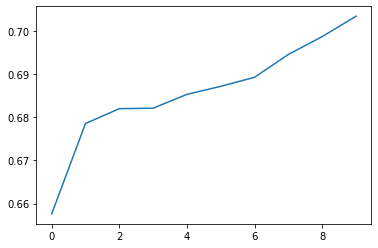

In [ ]:
# list all data in history
import matplotlib.pyplot as plt
print(his.history.keys())
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.29229596175840933
Mean Squared Error: 0.29229596175840933
Root Mean Squared Error: 0.5406440249909448


In [ ]:
dataset['y_pred'] = np.NaN
val=(len(dataset) - len(y_pred))
val

136396

In [ ]:
dataset.iloc[val:,-1:] = y_pred
trade_dataset = dataset.dropna()

In [ ]:
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,symbol,open,close,low,high,volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,y_pred,Tomorrows Returns
136426,2011-02-28,FOX,16.174909,16.254419,16.174909,16.378089,3162500.0,0.203180,0.079510,50.378890,43.824167,48.600389,19.834844,0,True,NaN
136427,2011-02-28,FOXA,15.326860,15.344519,15.282690,15.494700,15479500.0,0.212010,0.017659,32.210362,41.619609,47.958203,22.708446,1,True,-0.057606
136428,2011-02-28,FRT,83.110001,84.180000,83.089996,84.400002,553800.0,1.310006,1.069999,23.439646,31.353061,46.597853,27.951050,1,False,1.702199
136429,2011-02-28,FSLR,153.770004,147.389999,146.789993,155.210007,3847600.0,8.420014,-6.380005,38.592979,36.532061,46.522520,56.083859,0,False,0.560125
136430,2011-02-28,FTI,46.865001,47.025002,45.665001,47.029999,2390200.0,1.364998,0.160000,82.304839,48.107561,49.598520,55.400901,0,False,-1.142403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170520,2011-06-10,UTX,83.610001,82.699997,82.599998,83.860001,4282200.0,1.260003,-0.910004,25.226667,40.079000,38.447595,28.149179,0,False,1.223509
170521,2011-06-10,V,19.052500,18.672501,18.637501,19.077499,29456800.0,0.439999,-0.379999,43.116666,45.909000,39.730262,26.698814,1,True,-1.488168
170522,2011-06-10,VAR,66.050003,65.480003,65.360001,66.099998,853500.0,0.739997,-0.570000,41.900832,42.572250,38.586679,29.364308,0,True,1.254693
170523,2011-06-10,VFC,23.242500,22.950001,22.905001,23.430000,4783200.0,0.524999,-0.292499,55.617500,43.504250,39.602679,29.256146,1,True,-1.048427


In [ ]:
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)
trade_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,symbol,open,close,low,high,volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,y_pred,Tomorrows Returns
136426,2011-02-28,FOX,16.174909,16.254419,16.174909,16.378089,3162500.0,0.203180,0.079510,50.378890,43.824167,48.600389,19.834844,0,True,-0.057606
136427,2011-02-28,FOXA,15.326860,15.344519,15.282690,15.494700,15479500.0,0.212010,0.017659,32.210362,41.619609,47.958203,22.708446,1,True,1.702199
136428,2011-02-28,FRT,83.110001,84.180000,83.089996,84.400002,553800.0,1.310006,1.069999,23.439646,31.353061,46.597853,27.951050,1,False,0.560125
136429,2011-02-28,FSLR,153.770004,147.389999,146.789993,155.210007,3847600.0,8.420014,-6.380005,38.592979,36.532061,46.522520,56.083859,0,False,-1.142403
136430,2011-02-28,FTI,46.865001,47.025002,45.665001,47.029999,2390200.0,1.364998,0.160000,82.304839,48.107561,49.598520,55.400901,0,False,-1.711790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170520,2011-06-10,UTX,83.610001,82.699997,82.599998,83.860001,4282200.0,1.260003,-0.910004,25.226667,40.079000,38.447595,28.149179,0,False,-1.488168
170521,2011-06-10,V,19.052500,18.672501,18.637501,19.077499,29456800.0,0.439999,-0.379999,43.116666,45.909000,39.730262,26.698814,1,True,1.254693
170522,2011-06-10,VAR,66.050003,65.480003,65.360001,66.099998,853500.0,0.739997,-0.570000,41.900832,42.572250,38.586679,29.364308,0,True,-1.048427
170523,2011-06-10,VFC,23.242500,22.950001,22.905001,23.430000,4783200.0,0.524999,-0.292499,55.617500,43.504250,39.602679,29.256146,1,True,0.740588


In [ ]:
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
trade_dataset = trade_dataset.dropna()

In [ ]:
trade_dataset['change']=trade_dataset['close']-trade_dataset['Strategy Returns']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


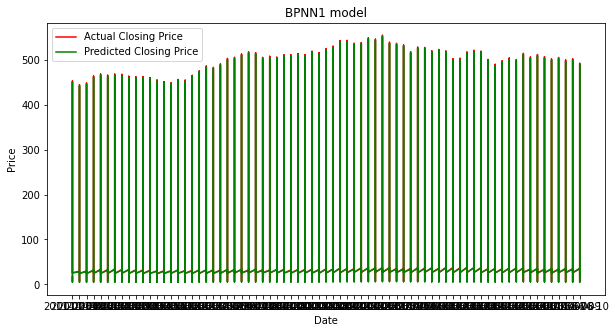

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['date'],trade_dataset['close'], color='r', label='Actual Closing Price')
plt.plot(trade_dataset['date'],trade_dataset['change'], color='g', label='Predicted Closing Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('BPNN1 model')
plt.legend()
plt.show()